# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#**Importing Requried Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

#**Reading and Understanding the Data**

In [ ]:
bike = pd.read_csv('day.csv')

In [ ]:
# Checking the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike.shape

(730, 16)

In [ ]:
# Checking the descriptive Infomation
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insights :**

Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

#**Data Quality Check**


In [ ]:
#checking the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insights:**
There are no missing / Null values

In [ ]:
# Checking for duplicates and dropping the entire duplicate row if any
bike_duplicate = bike.copy()

bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [ ]:
bike_duplicate.shape

(730, 16)

In [ ]:
bike.shape

(730, 16)

In [ ]:
# Checking value_counts() for entire dataframe to identify any Unknown/Junk values present in the dataset
for col in bike:
  print(bike[col].value_counts(),'\n\n\n')


1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 



01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.9894

# **Removing redundant & unwanted columns**

In [ ]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [ ]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#Encoding All cetegorical columns
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'weathersit_1 ',2:'weathersit_2',3:'weathersit_3'})
#in col weathersit we have assume the above value according to the description given in the dictionary
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


**Creating Dummy Variables**

In [ ]:
# This code does 3 things:
# 1) Creates Dummy variables
# 2) Drops  original variables for which the dummy was created
# 3) Drops first dummy variable for each set of dummies created.

bike_1 = pd.get_dummies(bike, drop_first=True)
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   hum                      730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   season_spring            730 non-null    uint8  
 9   season_summer            730 non-null    uint8  
 10  season_winter            730 non-null    uint8  
 11  mnth_aug                 730 non-null    uint8  
 12  mnth_dec                 730 non-null    uint8  
 13  mnth_feb                 730 non-null    uint8  
 14  mnth_jan                 7

# **Splitting the Data into Training and Testing Sets**

In [ ]:
# specifying 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_1, train_size = 0.70, test_size = 0.30, random_state = 100)

In [ ]:
bike_train.shape

(510, 30)

In [ ]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       510 non-null    int64  
 1   holiday                  510 non-null    int64  
 2   workingday               510 non-null    int64  
 3   temp                     510 non-null    float64
 4   atemp                    510 non-null    float64
 5   hum                      510 non-null    float64
 6   windspeed                510 non-null    float64
 7   cnt                      510 non-null    int64  
 8   season_spring            510 non-null    uint8  
 9   season_summer            510 non-null    uint8  
 10  season_winter            510 non-null    uint8  
 11  mnth_aug                 510 non-null    uint8  
 12  mnth_dec                 510 non-null    uint8  
 13  mnth_feb                 510 non-null    uint8  
 14  mnth_jan                 

In [ ]:
bike_test.shape

(219, 30)

**Visualising Numeric Variables**

<Figure size 2500x1000 with 0 Axes>

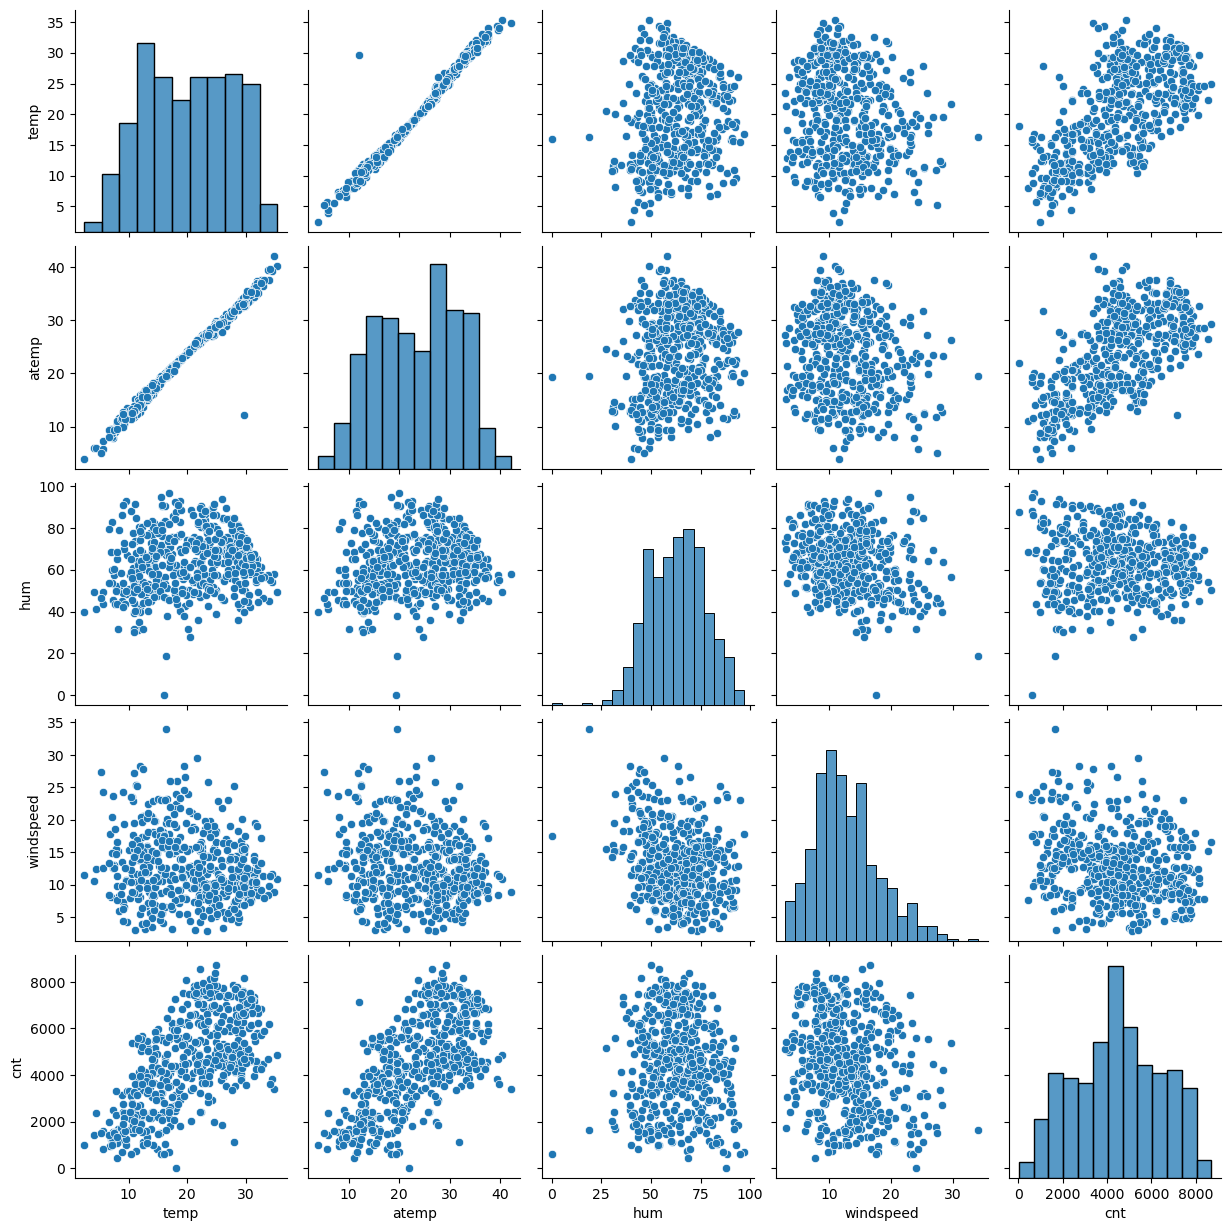

In [ ]:
# a pairplot of all the numeric variables.
bike_num = bike_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.figure(figsize=(25, 10))
sns.pairplot(bike_num)
plt.show()

**Insights:**

The above Pair-Plot tells us that there is a LINEAR RELATION between
'temp','atemp' and 'cnt'
- By looking at the pair-plot, ‘Temp’ has the highest correlation among the other numerical variables with the ‘Cnt’ as the target variable.

**Visualising Catagorical Variables**

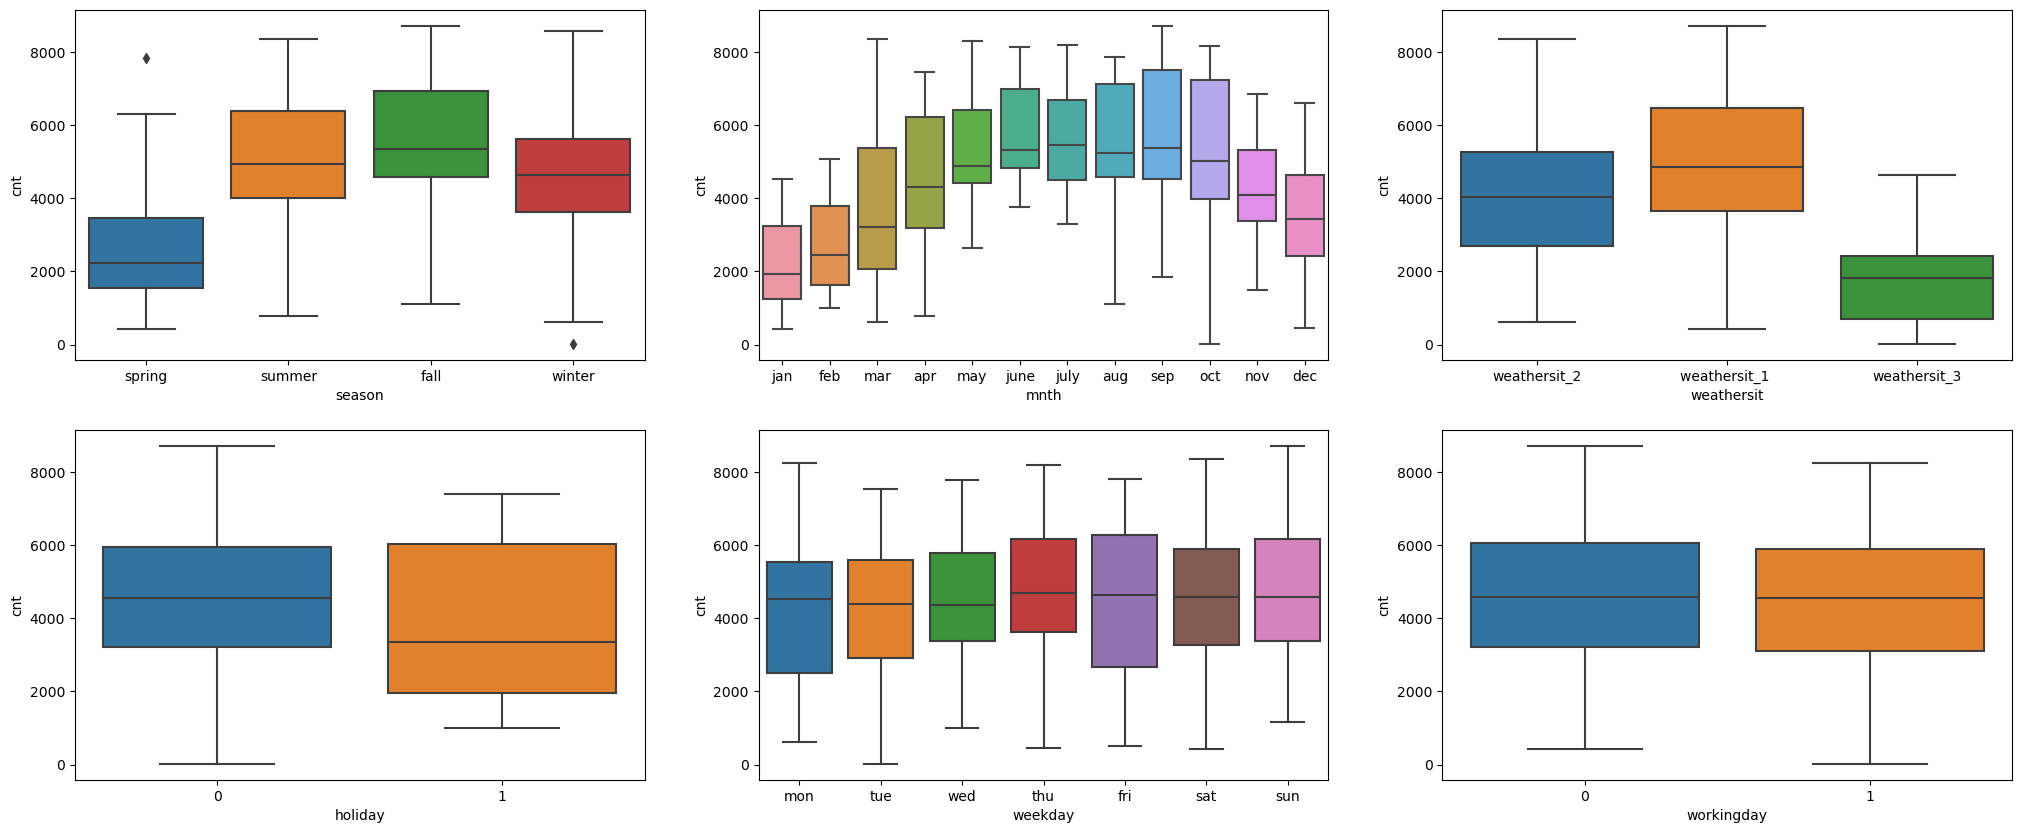

In [ ]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

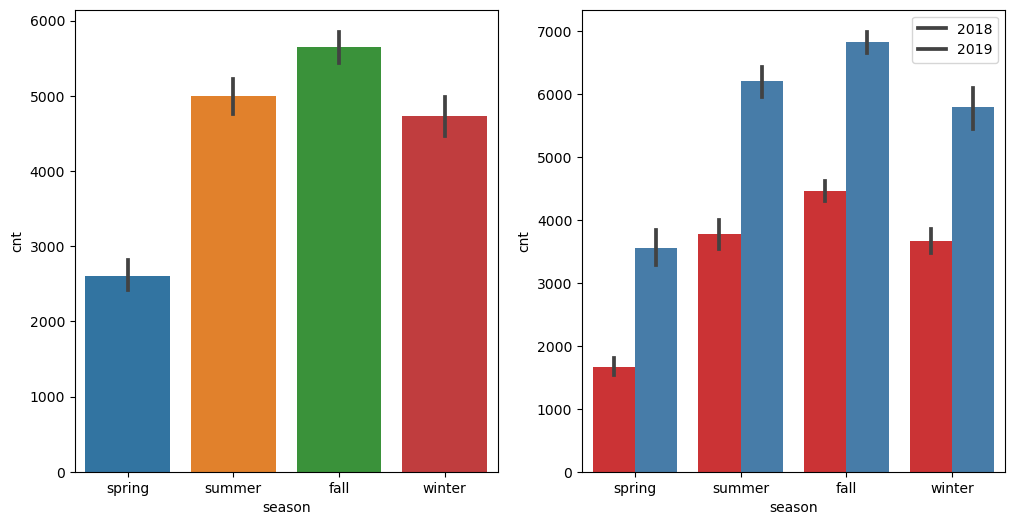

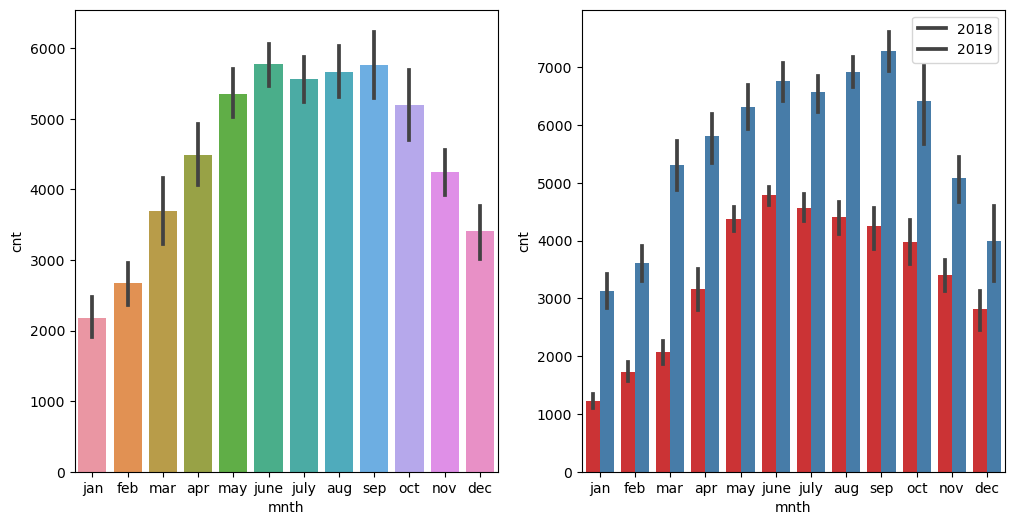

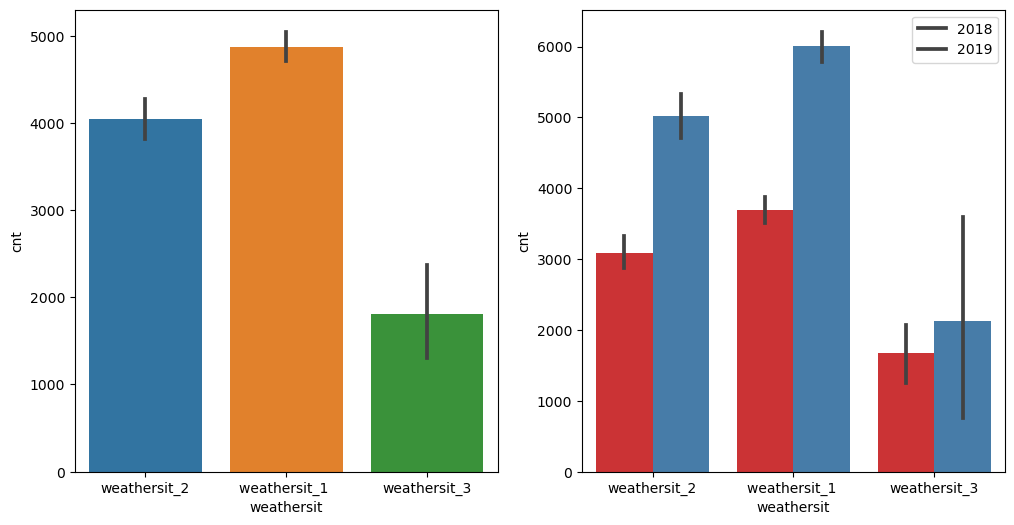

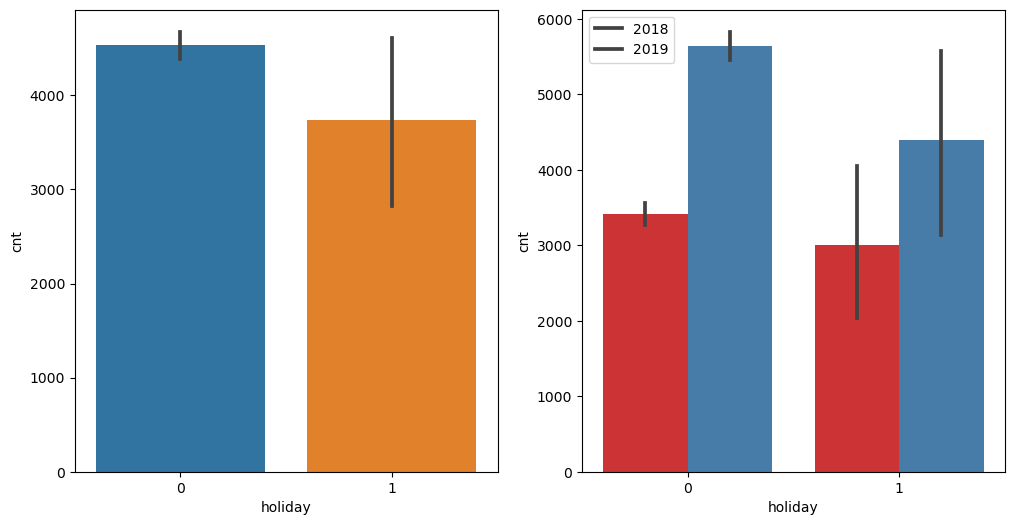

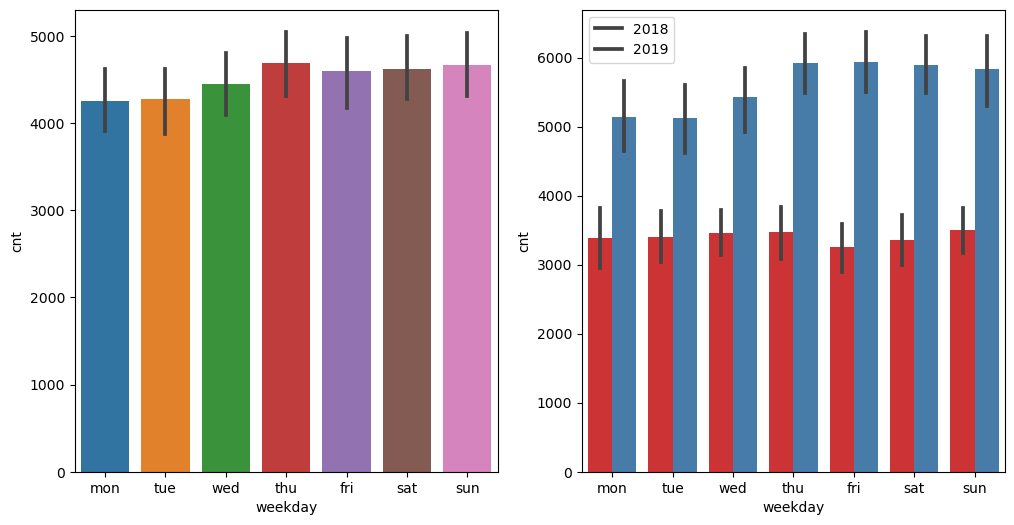

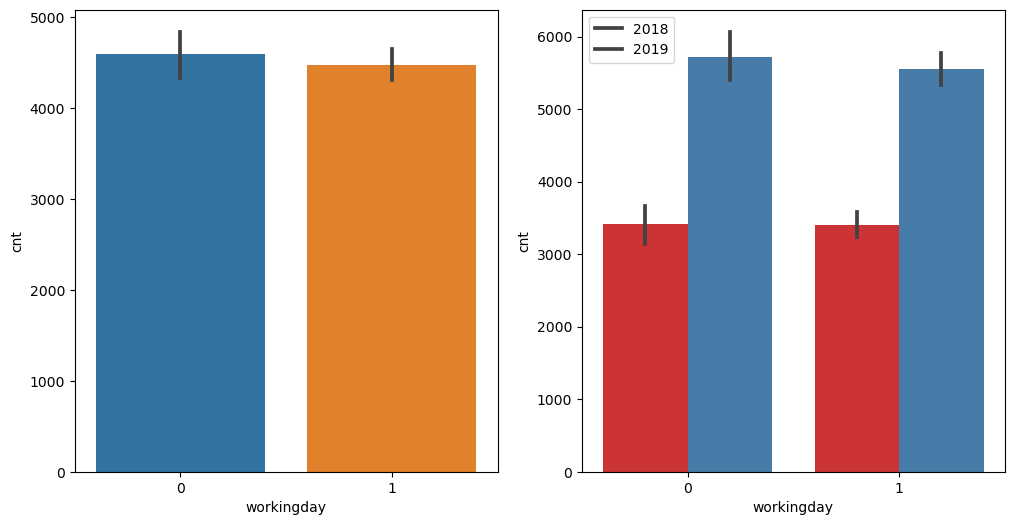

In [ ]:
bike_cat = ['season','mnth','weathersit','holiday','weekday','workingday']
for cols in bike_cat:
   plt.figure(figsize = (12,6))
   plt.subplot(1,2,1)
   sns.barplot(x = cols, y='cnt',data=bike)
   plt.subplot(1,2,2)
   sns.barplot(x=cols,y='cnt',data=bike, hue='yr',palette='Set1')
   plt.legend(labels=['2018', '2019'])
   plt.show()

**Insights:**

*   Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

*   Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

* Weathersit_1 attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

*   Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week

*   When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
*
Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.







**Correlation Matrix**

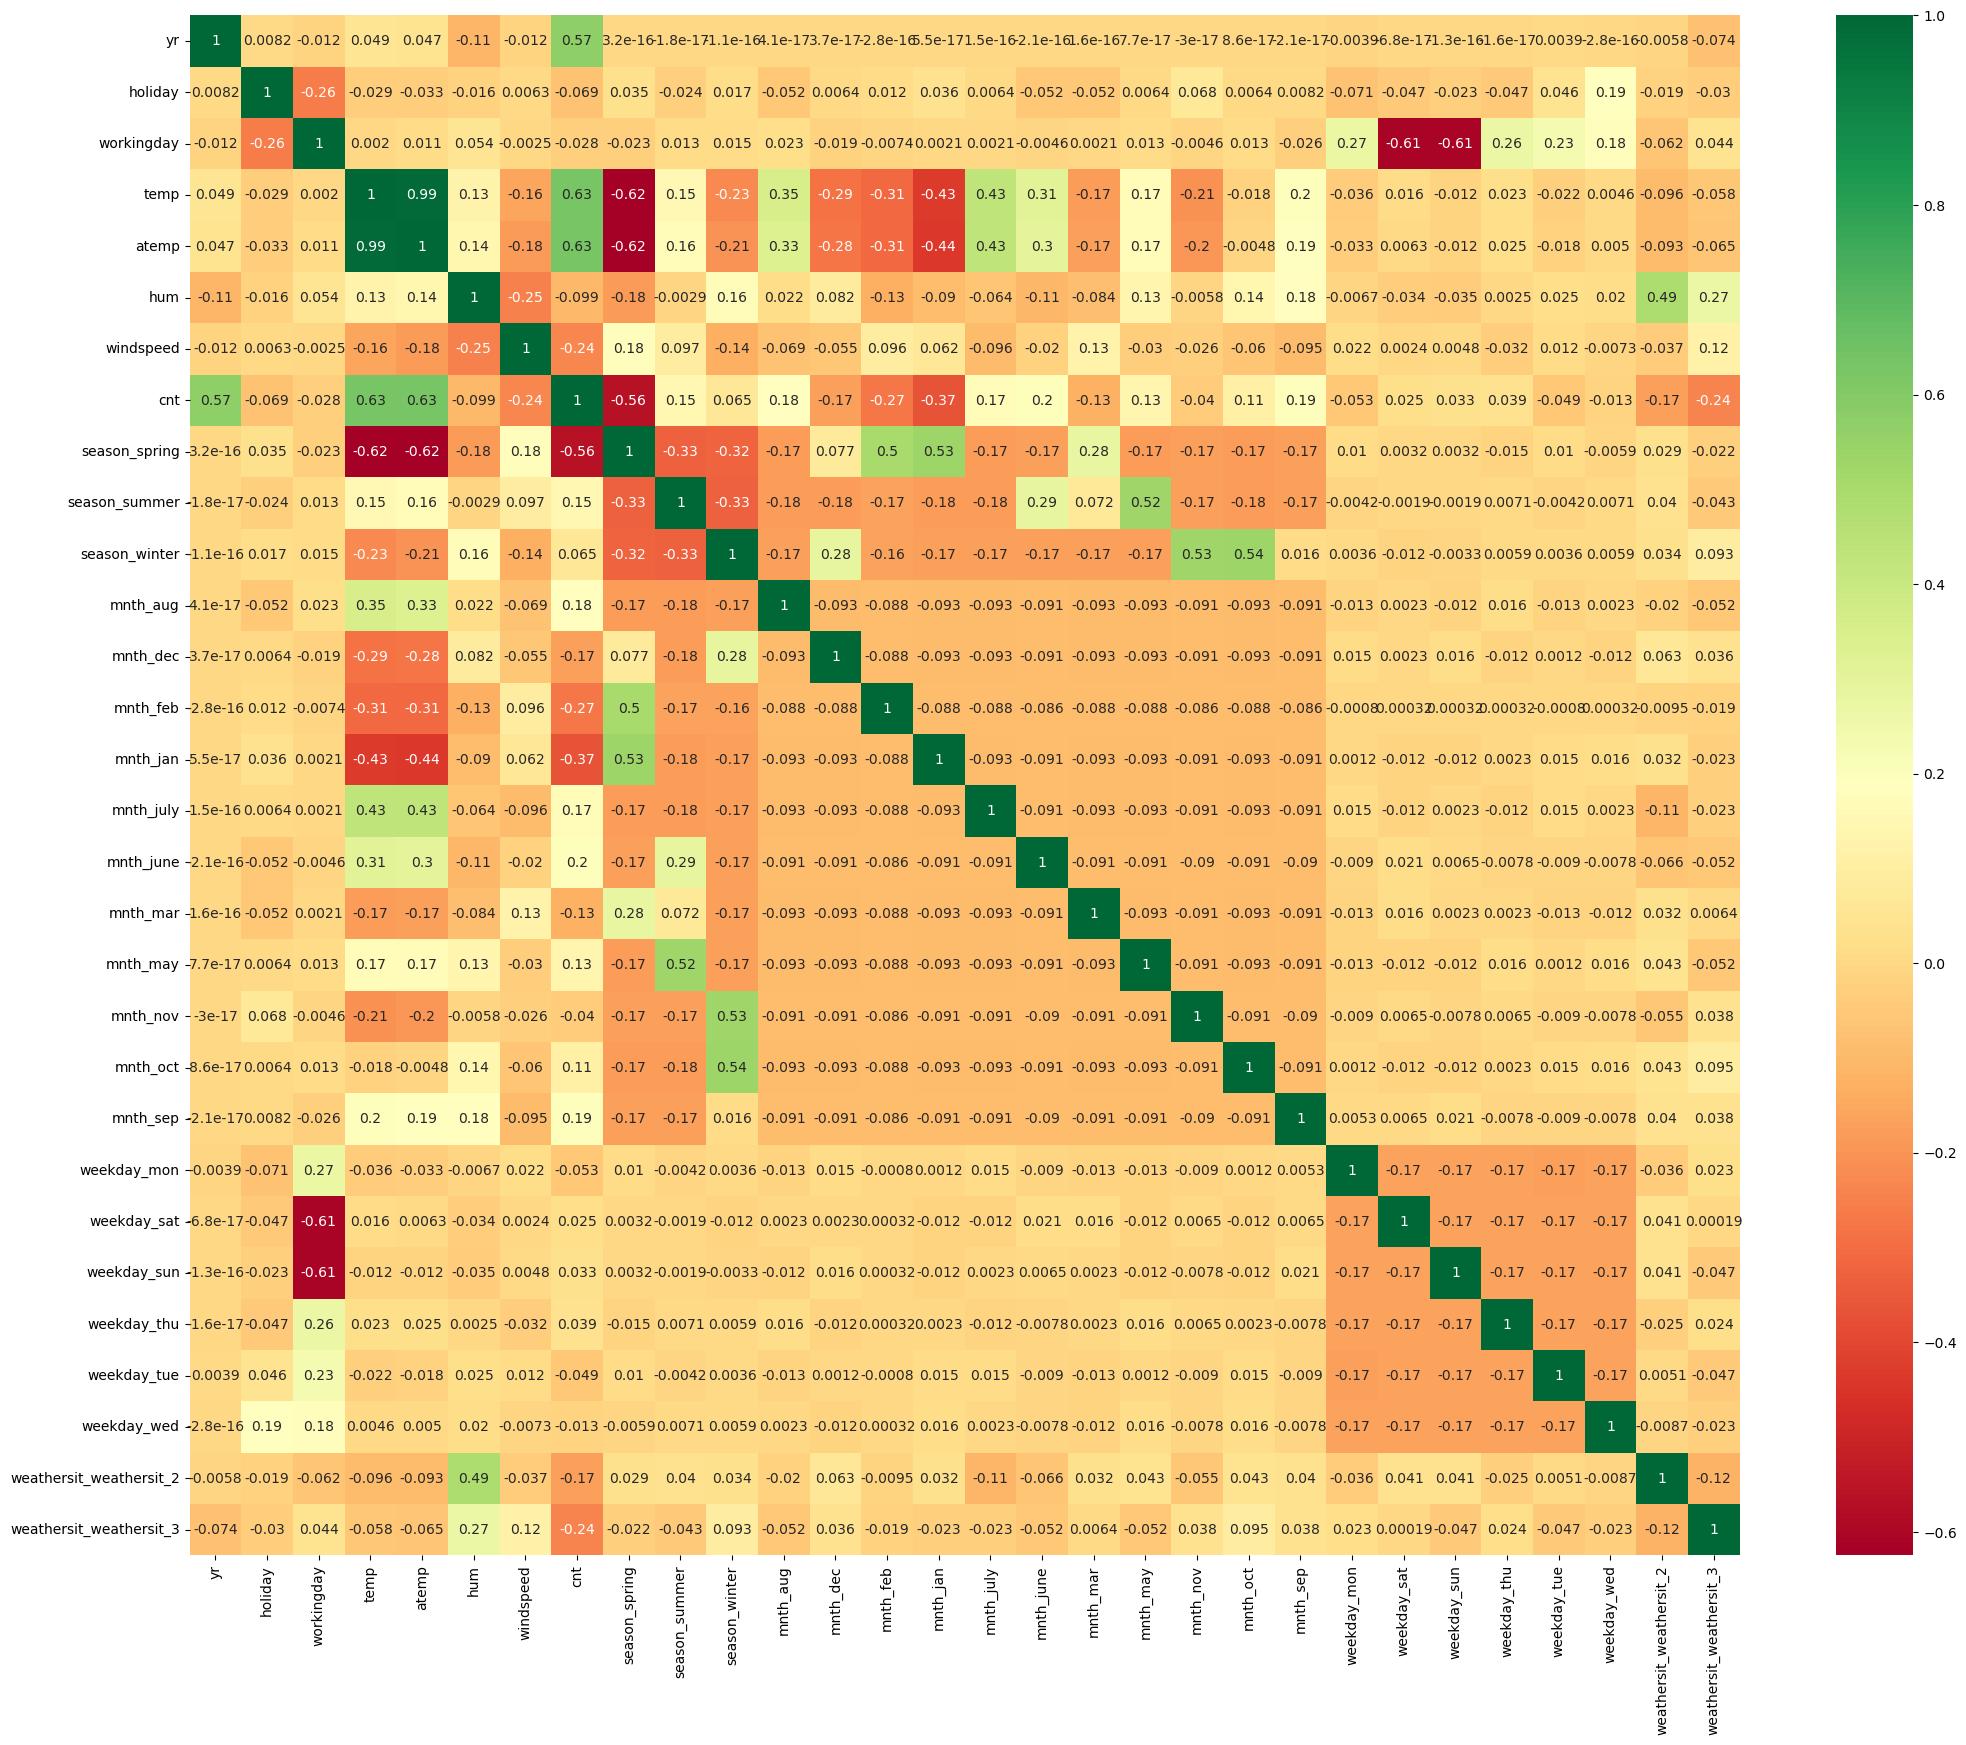

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_1.corr(), annot = True, cmap="RdYlGn")
plt.show()

**Insights:**

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# **Rescaling the Features**

In [ ]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [ ]:
# Checking values after scaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_weathersit_2,weathersit_weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# describing the dataset
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_weathersit_2,weathersit_weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


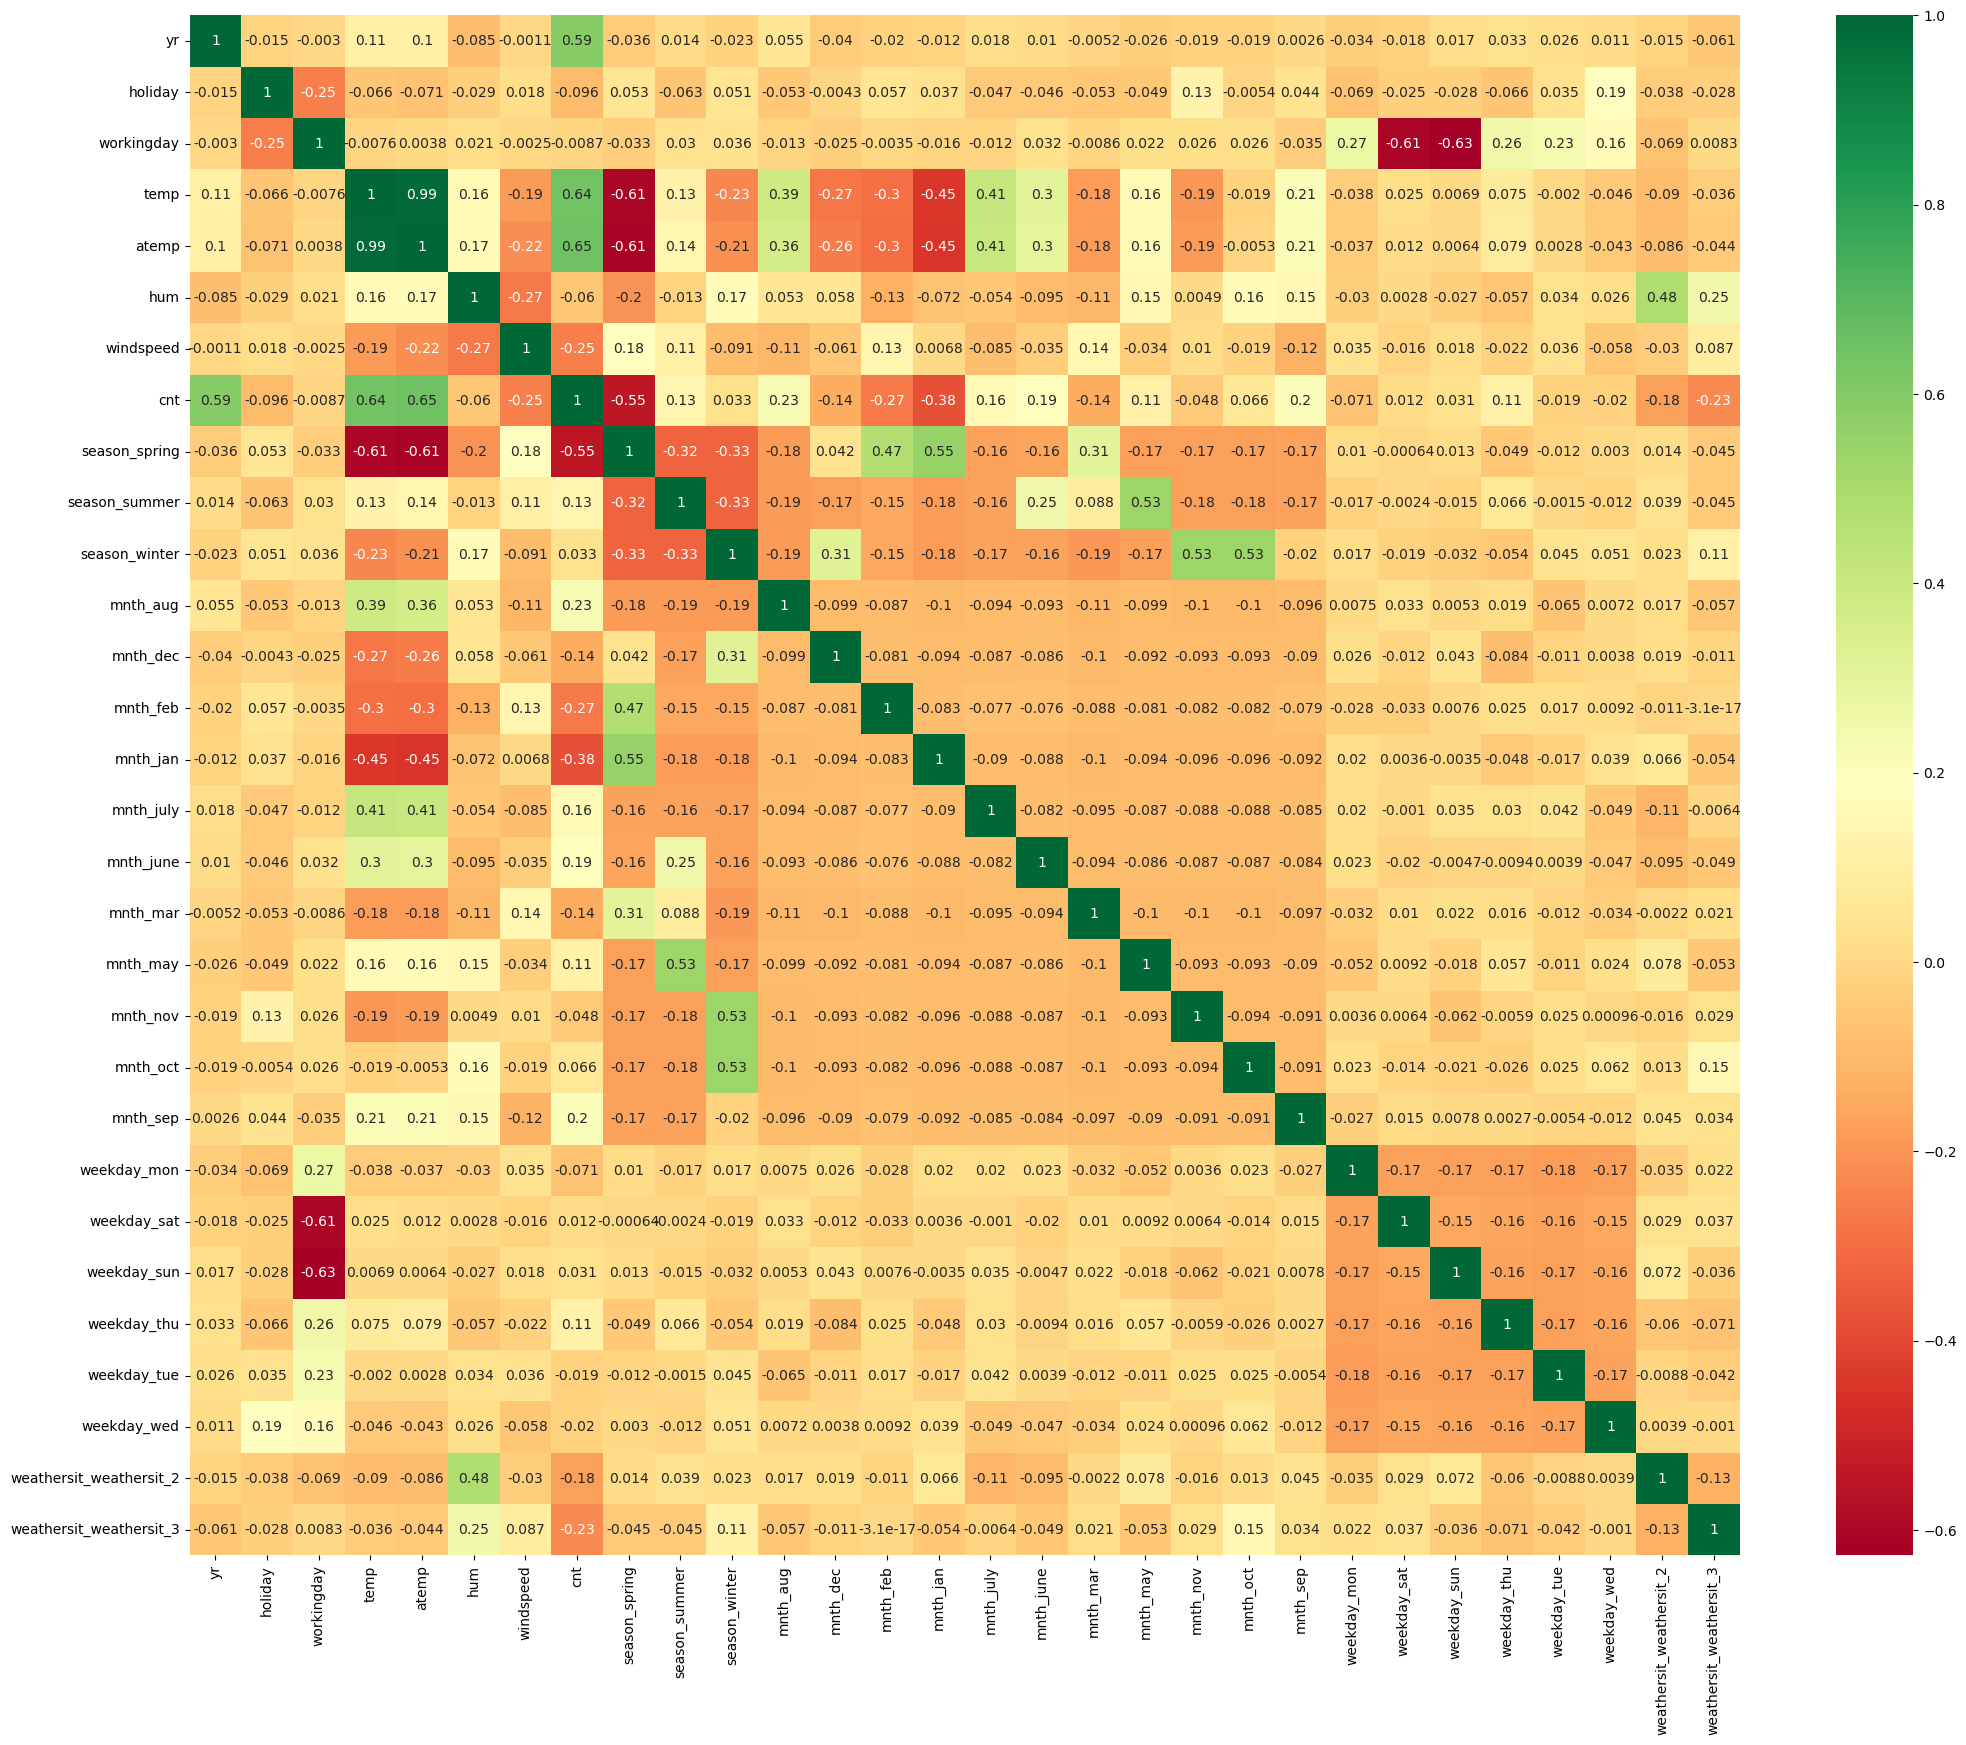

In [ ]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

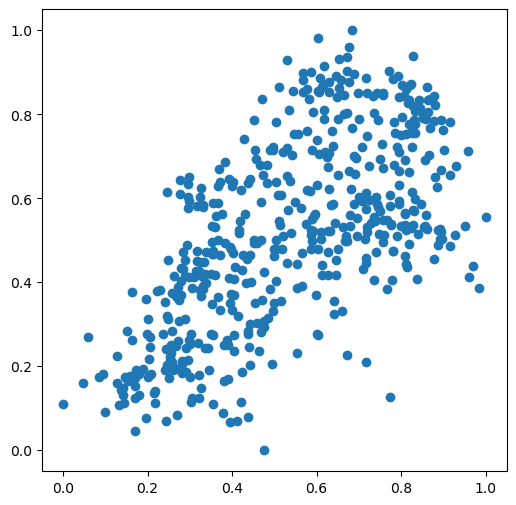

In [ ]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

# **Building A Linear Model**

In [ ]:
y_train = bike_train.pop('cnt')
X_train = bike_train

**RFE**

In [ ]:
# using Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_weathersit_2', True, 1),
 ('weathersit_weathersit_3', True, 1)]

In [ ]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_weathersit_2',
       'weathersit_weathersit_3'],
      dtype='object')

In [ ]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_july,mnth_nov,mnth_sep,weathersit_weathersit_2,weathersit_weathersit_3
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1,0
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,1,0


**Building Linear Model_1**

Model 1

In [ ]:
#VIF Check
#Creating Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_weathersit_2,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


In [ ]:
# 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.34e-189
Time:                        18:18:44   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# As humidity shows high VIF values hence dropping it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Running the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_july,1.59
12,weathersit_weathersit_2,1.56


**Model_2**

In [ ]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.57e-186
Time:                        18:18:44   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# dropping season_summer variable as it has high p-value
X_train_new = X_train_new.drop(['season_summer'], axis = 1)

# Running the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
11,weathersit_weathersit_2,1.53
6,mnth_dec,1.46
8,mnth_july,1.36


**Model_3**

In [ ]:
# Building 3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.08e-186
Time:                        18:18:44   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
#dropping mnth_nov variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.36
0,yr,2.06
5,season_winter,1.64
7,mnth_jan,1.64
10,weathersit_weathersit_2,1.53
8,mnth_july,1.36
6,mnth_dec,1.29
9,mnth_sep,1.20


**Model_4**

In [ ]:
# Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.02e-186
Time:                        18:18:44   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# dropping mnth_dec variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.25
0,yr,2.06
6,mnth_jan,1.60
9,weathersit_weathersit_2,1.53
5,season_winter,1.40
7,mnth_july,1.36
8,mnth_sep,1.20
10,weathersit_weathersit_3,1.08


**Model_5**

In [ ]:
# Building 5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.13e-186
Time:                        18:18:44   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# dropping mnth_jan variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
8,weathersit_weathersit_2,1.51
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
9,weathersit_weathersit_3,1.08
1,holiday,1.04


**Model_6**

In [ ]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.16e-186
Time:                        18:18:45   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We can cosider the above model i.e lr_6, as it seems to have very low
multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

For now, It canbe consider this as our final model

In [ ]:
# Checking the parameters and their coefficient values
lr_6.params

const                      0.251899
yr                         0.234092
holiday                   -0.098556
temp                       0.451455
windspeed                 -0.139817
season_spring             -0.110795
season_winter              0.047278
mnth_july                 -0.072719
mnth_sep                   0.057705
weathersit_weathersit_2   -0.081133
weathersit_weathersit_3   -0.286408
dtype: float64

**The equation of best fitted surface based on model lr6:**

*cnt = 0.2519 + (0.2341 * **yr** ) - (0.0986 * **holiday**) + (0.4515 * **temp**) - (0.1398 * **windspeed**) - (0.1108 * **season_spring**) + (0.0473 * **season_winter**) - (0.0727 * **mnth_july**) + (0.0577 * **mnth_sep**) - (0.0811 * **weathersit_weathersit_2**) - (0.2864 * **weathersit_weathersit_3**)*

# **Residual Analysis of the train data and validation**

In [ ]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_july,mnth_sep,weathersit_weathersit_2,weathersit_weathersit_3
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1,0


In [ ]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

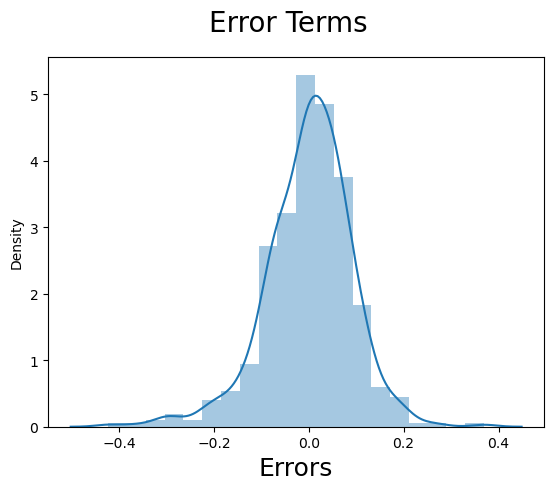

In [ ]:
# Plotting histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

**Multi Colinearity**

In [ ]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
8,weathersit_weathersit_2,1.51
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
9,weathersit_weathersit_3,1.08
1,holiday,1.04


**Insight**:

From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

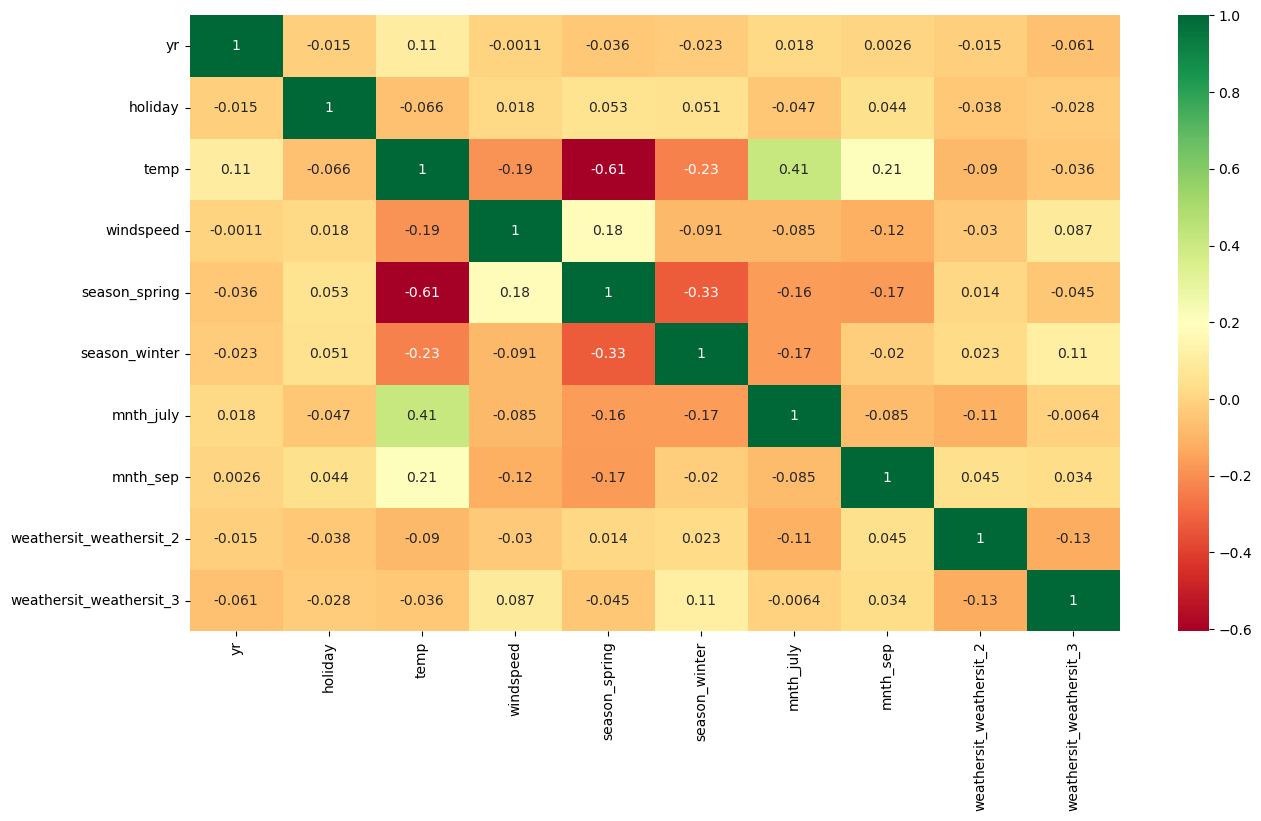

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

**Linearity**

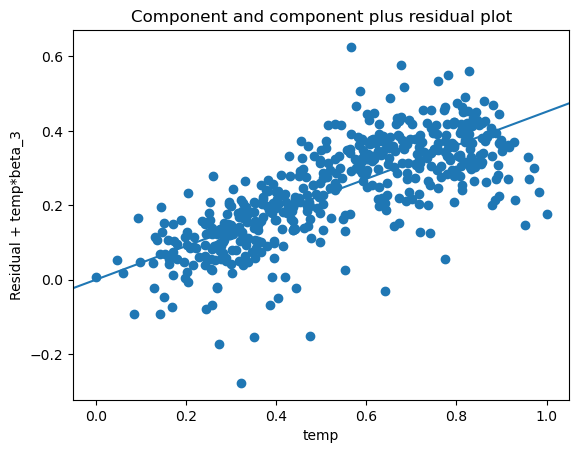

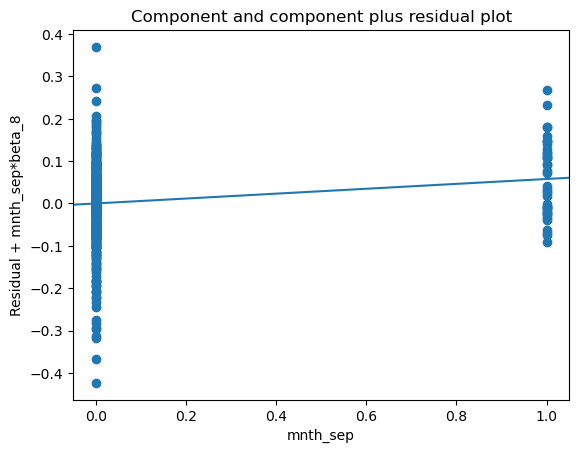

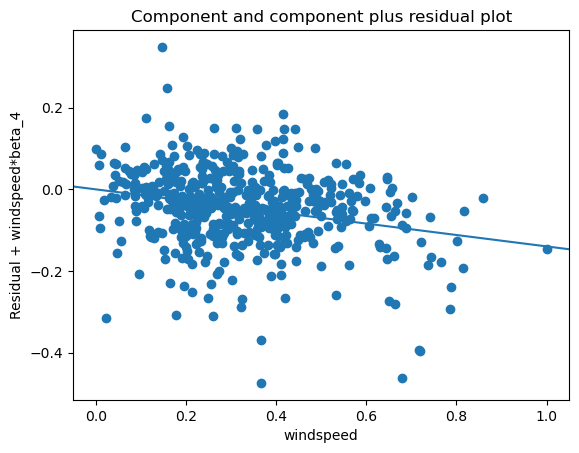

In [ ]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

**Homoscedasticity**

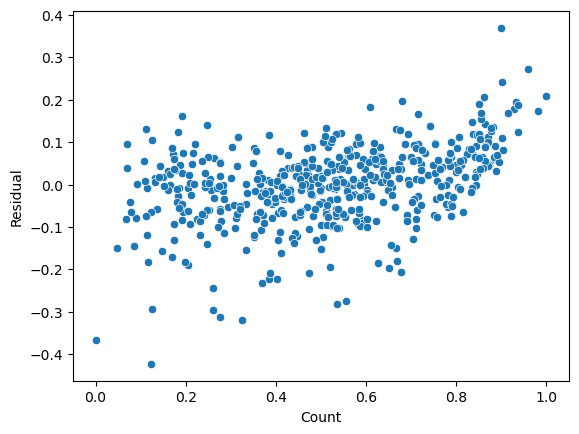

In [ ]:
y_train_pred = lr_6.predict(X_train_lm_6)
res = y_train - y_train_pred
sns.scatterplot(x=y_train,y=res)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

**Independence of residuals**

Durbin-Watson value of final model lr_6 is 2.002, which signifies there is no autocorrelation.

# **Making Predictions Using the Final Model**

In [ ]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [ ]:
# Applying scaling on the test dataset
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_weathersit_2,weathersit_weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_weathersit_2,weathersit_weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       219 non-null    int64  
 1   holiday                  219 non-null    int64  
 2   workingday               219 non-null    int64  
 3   temp                     219 non-null    float64
 4   atemp                    219 non-null    float64
 5   hum                      219 non-null    float64
 6   windspeed                219 non-null    float64
 7   season_spring            219 non-null    uint8  
 8   season_summer            219 non-null    uint8  
 9   season_winter            219 non-null    uint8  
 10  mnth_aug                 219 non-null    uint8  
 11  mnth_dec                 219 non-null    uint8  
 12  mnth_feb                 219 non-null    uint8  
 13  mnth_jan                 219 non-null    uint8  
 14  mnth_july                

In [ ]:
#Selecting the variables that were part of final model.
final_cols = X_train_new.columns
X_test = X_test[final_cols]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       219 non-null    int64  
 1   holiday                  219 non-null    int64  
 2   temp                     219 non-null    float64
 3   windspeed                219 non-null    float64
 4   season_spring            219 non-null    uint8  
 5   season_winter            219 non-null    uint8  
 6   mnth_july                219 non-null    uint8  
 7   mnth_sep                 219 non-null    uint8  
 8   weathersit_weathersit_2  219 non-null    uint8  
 9   weathersit_weathersit_3  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.8 KB


In [ ]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    219 non-null    float64
 1   yr                       219 non-null    int64  
 2   holiday                  219 non-null    int64  
 3   temp                     219 non-null    float64
 4   windspeed                219 non-null    float64
 5   season_spring            219 non-null    uint8  
 6   season_winter            219 non-null    uint8  
 7   mnth_july                219 non-null    uint8  
 8   mnth_sep                 219 non-null    uint8  
 9   weathersit_weathersit_2  219 non-null    uint8  
 10  weathersit_weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [ ]:
y_pred = lr_6.predict(X_test_lm6)

**Model Evaluation**

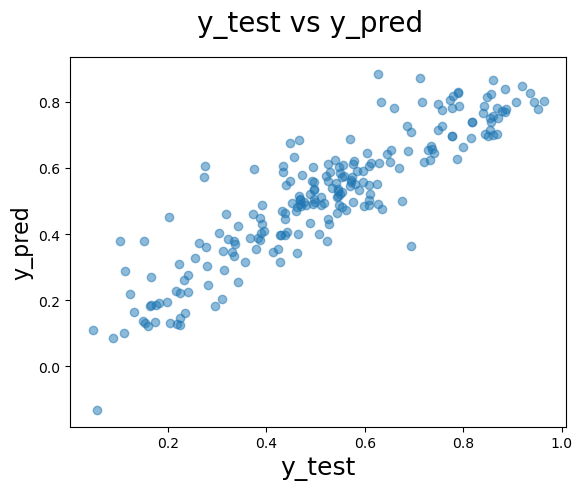

In [ ]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()


**r^2 Value for Test**

In [ ]:
r2=r2_score(y_test, y_pred)
r2

0.8070101019557961

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7977


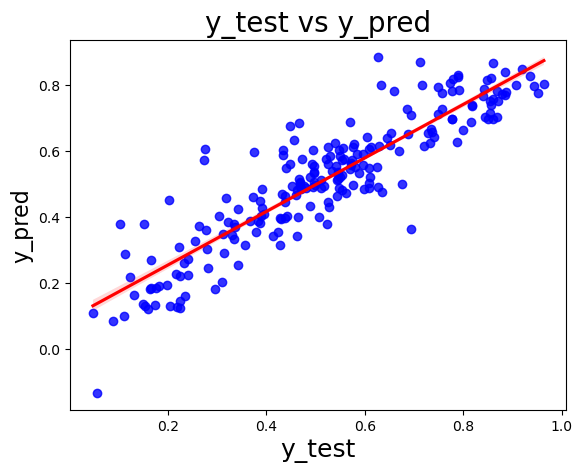

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

**Comparision between Training and Testing dataset:**
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8070
- Train dataset Adjusted R^2 : 0.830
- Test dataset Adjusted R^2  : 0.7977

# **Final Report**

As per our final Model, the top 3 predictor variables that influences the bike booking are:

* **Temperature (temp)** - A coefficient value of '0.4515'indicated that a unit increase in temp variable increases the bike hire numbers by 0.4515 units.
* **Weather Situation 3 (weathersit_3)** - A coefficient value of '-0.2864' indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2864 units.

* **Year (yr)** - A coefficient value of '0.2341' indicated that a unit increase in yr variable increases the bike hire numbers by 0.2341 units.

So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

#### **NOTE:**

The details of weathersit_1 & weathersit_3

*  **weathersit_2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*  **weathersit_3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


**Finally:**

Demand of bikes depends on 'year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_july', 'mnth_sep', 'weathersit_2','weathersit_3'